In [2]:

# Importing Libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

2023-01-07 21:18:03.575485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 21:18:04.014080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-07 21:18:04.014103: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-07 21:18:04.062169: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-07 21:18:04.847738: W tensorflow/stream_executor/platform/de

In [3]:
#dataset
RAV = r"/home/zolito/Dataset/RAVDESS"
rav = os.listdir(RAV)
rav.sort()
print("Ravdess files: ",rav[:])
print()

  

Ravdess files:  ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']



In [4]:
# rav = os.listdir(RAV)
# rav.sort()

emotion = []
gender = []
path = []
for i in rav:
    fname = os.listdir(RAV +"/"+ i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + "/"+i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprised'})
RAV_df = pd.concat([RAV_df],axis=1)
# RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['emotion']
# RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.emotion
# RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
# RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df = RAV_df.drop(['emotion'], axis=1)
RAV_df.labels.value_counts()

disgust      192
calm         192
surprised    192
fear         192
happy        192
sad          192
angry        192
neutral       96
Name: labels, dtype: int64

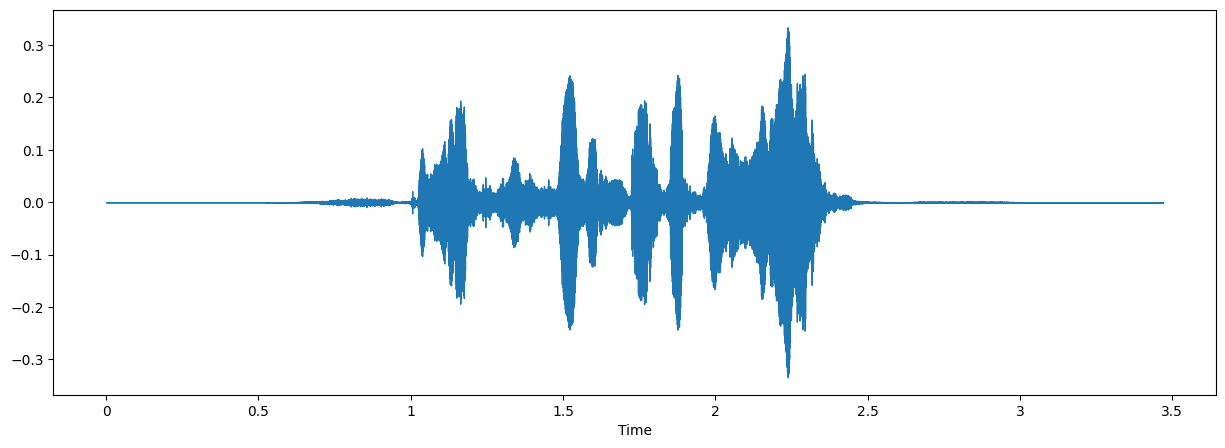

In [5]:
# fear audio from Ravdess dataset
fname = RAV + '/Actor_14/03-01-06-02-02-02-14.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

In [6]:
# feature extraction 
def extract_feature(path):
    
    X,_ = librosa.load(path)
    stft = librosa.amplitude_to_db(abs(librosa.stft(X)))
    mfcc = librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=X, sr=13)
    
    return stft,mfcc,chroma


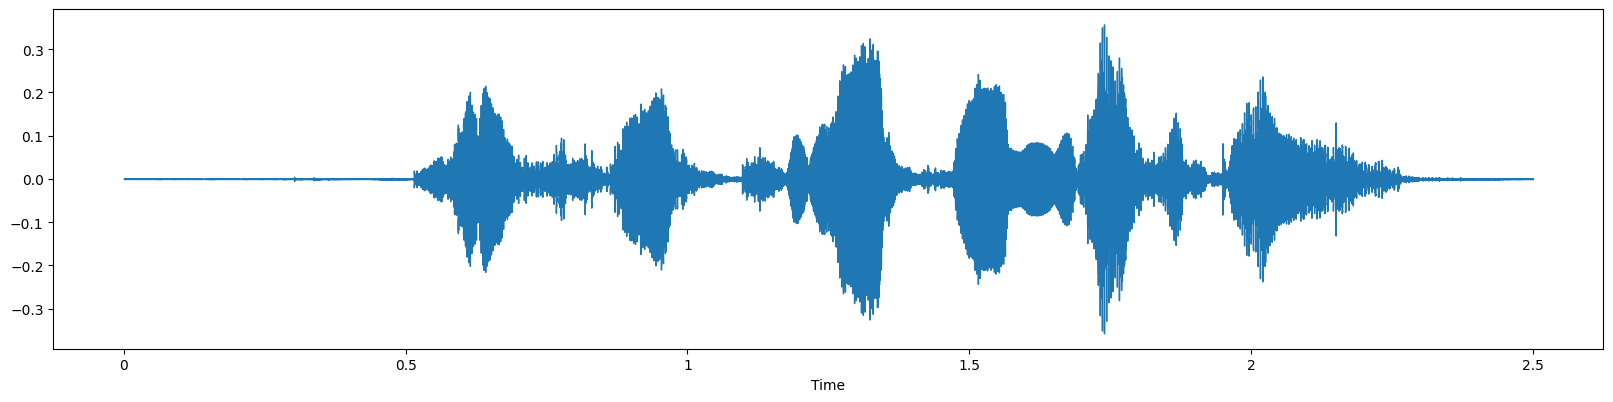

In [7]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"/Actor_08/03-01-05-02-01-01-08.wav"
X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
stft,mfcc,chroma = extract_feature(path)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=rate)
ipd.Audio(path)



In [8]:
df = pd.concat([RAV_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

disgust      192
calm         192
surprised    192
fear         192
happy        192
sad          192
angry        192
neutral       96
Name: labels, dtype: int64


<AxesSubplot: xlabel='labels', ylabel='count'>

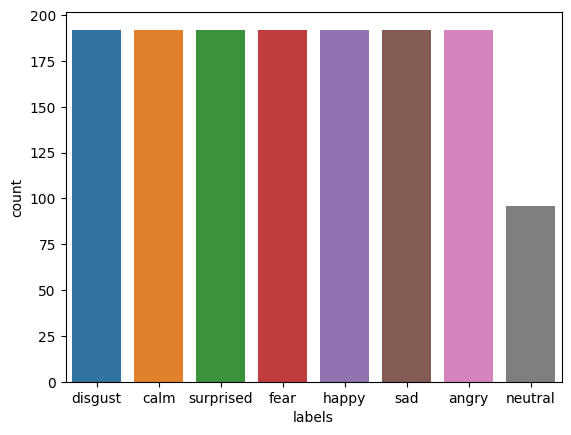

In [9]:
sns.countplot(x=df['labels'])


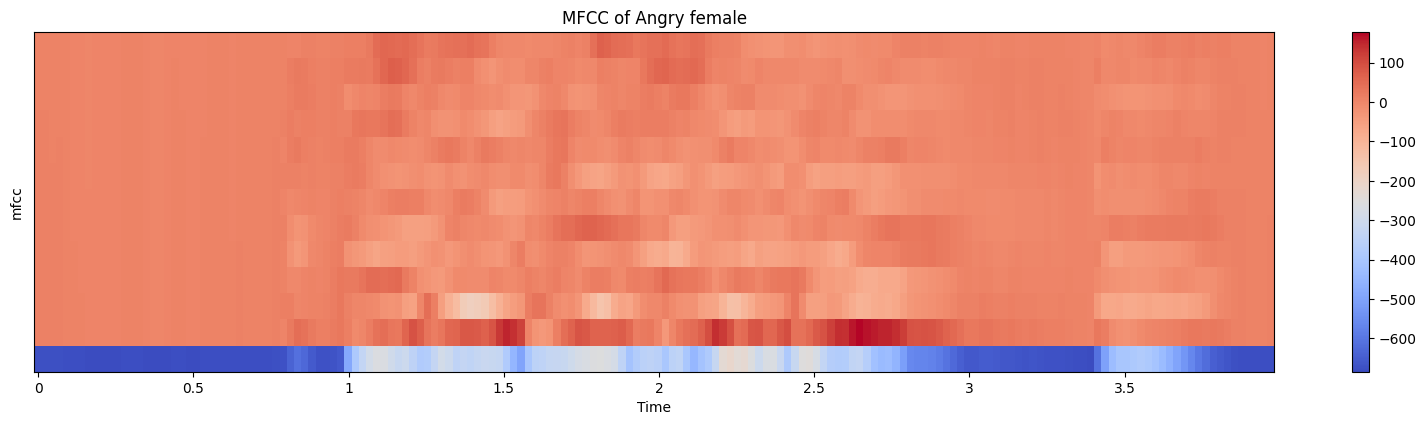

In [10]:
# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('mfcc')
plt.title("MFCC of Angry female")
plt.colorbar()

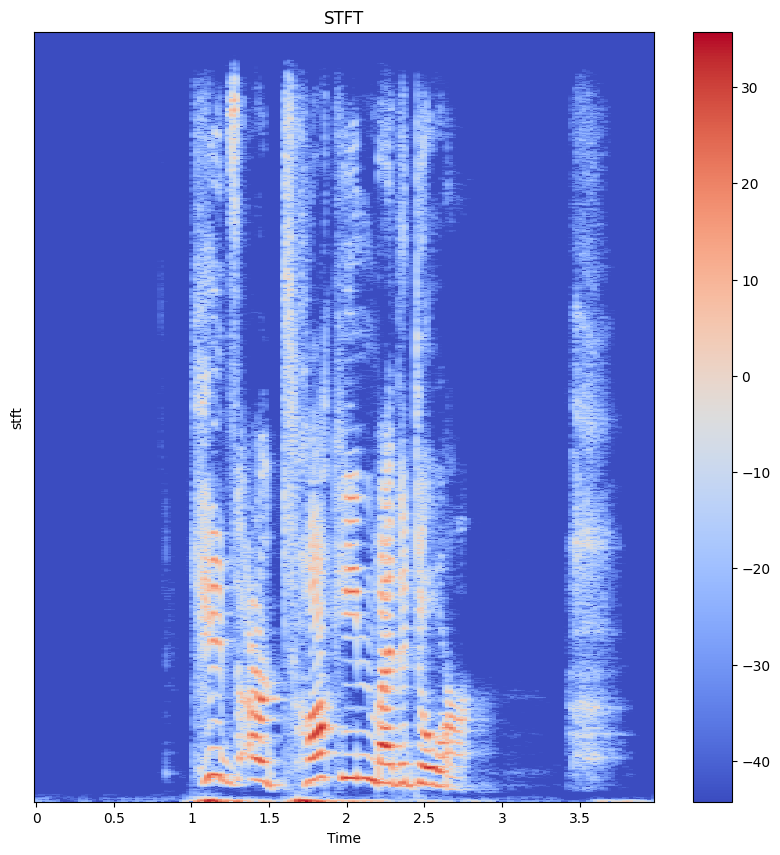

In [11]:
#stft
plt.figure(figsize=(10, 10))
librosa.display.specshow(stft, x_axis='time')
plt.ylabel('stft')
plt.title('STFT')
plt.colorbar()


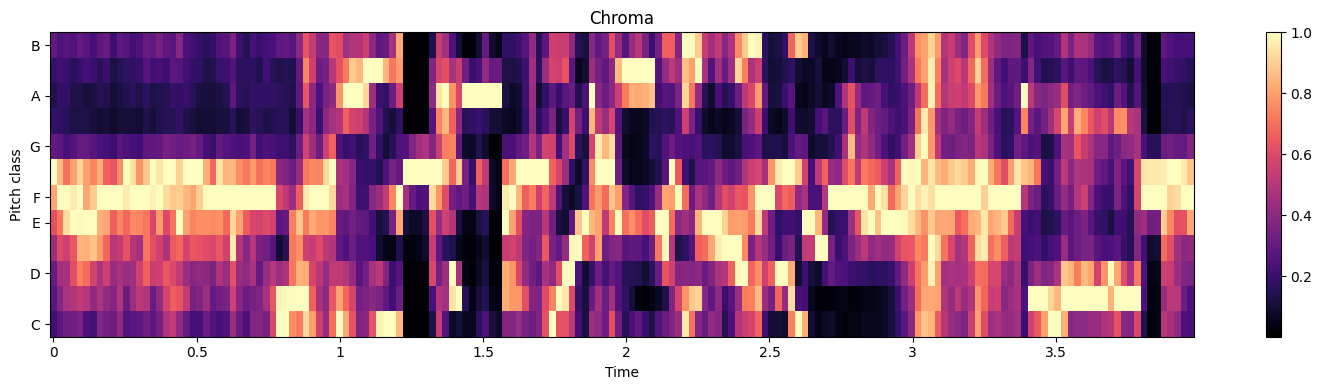

In [12]:
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()

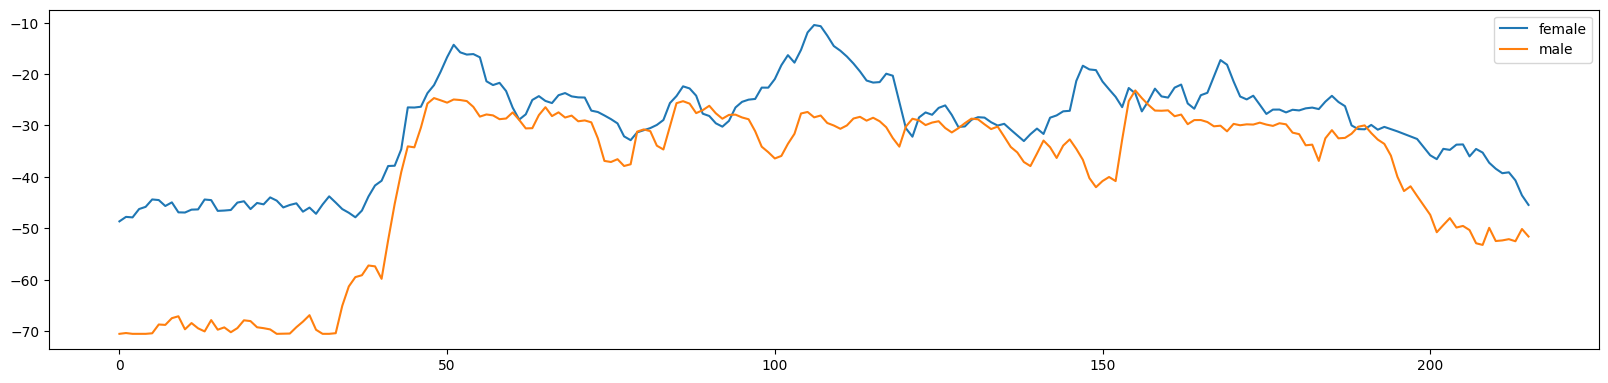

In [13]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(female))

# Source - RAVDESS Dataset, Gender -> Male, Emotion -> Angry 
path = RAV+"/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()



In [14]:


import keras
from keras import regularizers
# from keras.preprocessing import sequence
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle



In [15]:
full_path = pd.read_csv(r"/home/zolito/PycharmProjects/Voice emotion rec/Data_path.csv")
full_path.head(10)

,labels,source,path
0,disgust,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-07...
1,calm,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-02...
2,surprised,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-08...
3,fear,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-06...
4,happy,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-03...
5,sad,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-04...
6,angry,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-05...
7,disgust,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-07...
8,fear,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-06...
9,calm,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-02...


In [16]:
def choosen_feature_extractor(fe):
    df = pd.DataFrame(columns=['feature'])

    # loop feature extraction over the entire dataset
    counter=0
    for index,path in enumerate(full_path.path):
        
        X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
        rate = np.array(rate)
        if fe=='mfcc':
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13),axis=0)  # mean as the feature
            df.loc[counter] = [mfccs]
            counter+=1  
        
        elif fe=='stft':
            stft = np.mean(librosa.amplitude_to_db(abs(librosa.stft(X))),axis=0)  # mean as the feature
            df.loc[counter]=[stft]
            counter+=1
    
        elif fe=='chroma':
            chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=13),axis=0)  # mean as the feature
            df.loc[counter]=[chroma]
            counter+=1
            
    # Check a few records to make sure its processed successfully
    print(len(df))
    return df

In [17]:
fe = input('Enter the feature extractor: ')
df = choosen_feature_extractor(fe)
df.head()


Enter the feature extractor: stft
1440


,feature
0,"[-44.086617, -43.60697, -43.97314, -44.41941, ..."
1,"[-65.067986, -65.067986, -65.067986, -65.06798..."
2,"[-56.3017, -56.3017, -56.3017, -56.3017, -56.3..."
3,"[-58.820503, -58.820503, -58.820503, -58.82050..."
4,"[-50.777508, -50.777508, -50.777508, -50.77750..."


In [18]:


df = pd.concat([full_path,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]



,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,disgust,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-07...,-44.086617,-43.606972,-43.973141,-44.419411,-44.702591,-44.819035,-44.969723,...,-39.269886,-39.942272,-40.541908,-40.997959,-41.537209,-41.482258,-41.148109,-40.701035,-40.052879,-39.912338
1,calm,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-02...,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,...,-64.808647,-64.746948,-64.793442,-64.855881,-64.958321,-64.939026,-64.752426,-64.675957,-64.818565,-64.928490
2,surprised,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-08...,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,...,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701
3,fear,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-06...,-58.820503,-58.820503,-58.820503,-58.820503,-58.820503,-58.819000,-58.797115,...,-57.982712,-58.115250,-58.129211,-58.131966,-58.235458,-58.174515,-58.253544,-58.344913,-58.471535,-58.271759
4,happy,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-03...,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,...,-41.920105,-42.712967,-43.377495,-44.125732,-45.305744,-46.526508,-47.234699,-48.113789,-48.874451,-49.689758


In [19]:
df=df.fillna(0)
print(df.shape)
df[:]

(1440, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,disgust,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-07...,-44.086617,-43.606972,-43.973141,-44.419411,-44.702591,-44.819035,-44.969723,...,-39.269886,-39.942272,-40.541908,-40.997959,-41.537209,-41.482258,-41.148109,-40.701035,-40.052879,-39.912338
1,calm,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-02...,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,-65.067986,...,-64.808647,-64.746948,-64.793442,-64.855881,-64.958321,-64.939026,-64.752426,-64.675957,-64.818565,-64.928490
2,surprised,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-08...,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,...,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701,-56.301701
3,fear,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-06...,-58.820503,-58.820503,-58.820503,-58.820503,-58.820503,-58.819000,-58.797115,...,-57.982712,-58.115250,-58.129211,-58.131966,-58.235458,-58.174515,-58.253544,-58.344913,-58.471535,-58.271759
4,happy,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_01/03-01-03...,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,-50.777508,...,-41.920105,-42.712967,-43.377495,-44.125732,-45.305744,-46.526508,-47.234699,-48.113789,-48.874451,-49.689758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,calm,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_24/03-01-02...,-65.436768,-65.418556,-65.364075,-65.424370,-65.401665,-65.374893,-65.422684,...,-54.442284,-54.605068,-54.657707,-54.885738,-55.308720,-55.704445,-56.376091,-56.393963,-56.114338,-56.108513
1436,sad,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_24/03-01-04...,-64.973320,-64.973320,-64.973320,-64.973320,-64.973320,-64.973320,-64.973320,...,-56.393917,-56.480507,-55.314991,-54.970367,-56.688148,-57.011425,-56.299393,-55.583004,-56.372494,-58.067913
1437,happy,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_24/03-01-03...,-58.708675,-58.708675,-58.708675,-58.681580,-58.639233,-58.703125,-58.708675,...,-53.718250,-49.894100,-49.576012,-52.456169,-48.156239,-49.190136,-55.441113,-56.696678,-57.484062,-57.714077
1438,surprised,RAVDESS,/home/zolito/Dataset/RAVDESS/Actor_24/03-01-08...,-52.790283,-52.790283,-52.541878,-52.504097,-52.751007,-52.695087,-52.707829,...,-52.790283,-52.790283,-52.790283,-52.790123,-52.790283,-52.790283,-52.790283,-52.790283,-52.790283,-52.790283


In [20]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle

ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (/home/zolito/.local/lib/python3.10/site-packages/keras/preprocessing/sequence.py)

In [21]:
    
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.15
                                                    , shuffle=False
                                                    , random_state=0
                                                   )

    
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=0)                                                   )
    
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
#                                                     , df.labels
#                                                     , test_size=0.25
#                                                     , shuffle=True
#                                                     , random_state=42
#                                                    )

# Lets see how the data present itself before normalisation 
X_train[100:110]



,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
100,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,-57.968369,...,-57.775921,-57.755772,-57.753437,-57.655579,-57.671959,-57.750191,-57.909977,-57.923744,-57.748177,-57.774456
101,-39.254963,-38.001358,-37.924591,-37.851887,-37.658970,-37.331791,-37.317783,-37.003330,-36.893093,-36.413788,...,-41.650692,-41.625355,-41.628269,-41.644997,-41.650692,-41.650692,-41.650692,-41.650692,-41.650692,-41.650692
102,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,-52.467529,...,-51.780823,-51.841633,-51.985767,-52.124187,-52.042866,-52.193771,-52.296268,-52.305542,-52.187138,-51.295498
103,-46.599762,-45.844830,-45.840088,-46.534943,-46.599609,-46.553642,-46.516628,-45.501541,-44.622303,-45.198681,...,-46.640373,-46.636547,-46.640373,-46.639271,-46.638424,-46.640373,-46.640373,-46.640373,-46.640373,-46.640373
104,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,-60.398682,...,-51.393097,-50.753544,-49.879429,-49.658855,-49.844742,-50.420303,-50.436203,-50.671345,-50.907082,-50.745720
105,-58.159317,-58.159317,-58.159317,-58.159317,-58.159317,-58.117256,-57.638538,-57.670273,-58.112804,-58.139568,...,-57.883499,-57.940247,-57.889244,-57.898117,-57.935314,-57.939163,-57.944603,-57.960957,-57.927906,-58.036476
106,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,-55.758224,...,-55.484665,-55.620296,-55.712639,-55.702534,-55.682980,-55.654251,-55.647327,-55.739906,-55.746437,-55.734444
107,-52.456158,-52.456158,-52.456158,-52.456158,-52.456158,-52.456158,-52.456158,-52.456158,-52.456158,-52.419106,...,-52.252918,-52.295006,-52.350258,-52.404026,-52.444427,-52.429443,-52.446182,-52.436928,-52.430195,-52.453247
108,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,-47.284992,...,-46.743248,-46.857929,-46.997158,-47.152271,-47.156723,-47.072388,-47.120949,-47.166901,-47.204514,-47.273262
109,-45.019833,-45.019833,-45.019833,-45.019718,-44.988937,-44.878151,-44.834560,-44.620686,-44.087395,-43.342842,...,-43.868866,-44.195831,-44.472668,-44.640293,-44.772739,-44.939415,-45.011986,-45.019833,-45.019833,-45.019833


In [22]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
150,-0.442306,-0.455289,-0.462330,-0.462633,-0.460893,-0.459216,-0.455342,-0.455943,-0.460129,-0.462997,...,-0.396239,-0.477452,-0.500805,-0.515283,-0.526875,-0.521246,-0.530236,-0.532105,-0.546630,-0.555550
151,1.401528,1.430504,1.389138,1.349005,1.310204,1.250276,1.198561,1.162589,1.144124,1.135022,...,2.483462,2.398315,2.303897,2.147049,2.011708,1.969992,1.923077,1.894998,1.957646,2.120627
152,1.387428,1.366721,1.364382,1.361704,1.356112,1.346301,1.339192,1.331984,1.322561,1.316456,...,1.212852,1.256954,1.274808,1.269458,1.170497,1.124444,1.114930,1.100127,1.074292,1.043984
153,0.300764,0.281460,0.279968,0.278461,0.275165,0.270442,0.267099,0.264007,0.257936,0.254092,...,0.250729,0.272391,0.290517,0.290717,0.260838,0.237962,0.243857,0.229140,0.220948,0.175079
154,-0.707900,-0.725905,-0.726609,-0.727029,-0.728194,-0.728194,-0.728042,-0.727314,-0.730272,-0.732018,...,-0.052819,-0.069106,0.088753,0.209313,-0.042513,-0.319131,-0.388094,-0.427475,-0.446184,-0.456922
155,0.057549,0.039299,0.039319,0.040754,0.041093,0.061312,0.091385,0.101944,0.073205,0.041477,...,-0.093654,-0.108712,-0.106446,-0.117593,-0.129941,-0.113262,-0.098805,-0.094176,-0.100917,-0.112558
156,1.767827,1.746461,1.743649,1.740962,1.854612,2.140384,2.533338,2.824072,2.870407,2.936503,...,2.424582,2.656851,2.822479,2.867404,2.809711,2.875965,2.864876,2.659791,2.497706,2.593557
157,1.480326,1.485847,1.445976,1.430428,1.415851,1.395894,1.419744,1.460735,1.497790,1.519358,...,1.060494,0.984891,1.026816,1.120351,1.207795,1.340647,1.457691,1.513720,1.485598,1.349022
158,0.057440,-0.105760,-0.205096,-0.236550,-0.242729,-0.257983,-0.269941,-0.282362,-0.300502,-0.307238,...,0.289179,0.268770,0.251489,0.223920,0.210111,0.218424,0.238612,0.270550,0.266286,0.220800
159,1.105512,1.085170,1.083050,1.080676,1.075680,1.067189,1.061057,1.054917,1.046363,1.040845,...,0.904042,0.899590,0.912666,0.906620,0.883116,0.877864,0.892540,0.863177,0.846748,0.769445


In [23]:
# X_train = np.array(choosen_feature_extractor(fe)['feature'].tolist())
# y_train = np.array(choosen_feature_extractor(fe)['labels'].tolist())
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
# y_train = np_utils.to_categorical(y_train, 8)
# y_test = np_utils.to_categorical(y_test, 8)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()


(1224, 216)
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


In [24]:
num_labels= y_train.shape[1]
print(num_labels)

8


In [25]:
X_test.shape

(216, 216)

In [26]:
X_train.shape

(1224, 216)

In [27]:
print(mfcc.shape)

(13, 172)


In [28]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1224, 216, 1)

In [92]:


# model=Sequential()
# ###first layer
# model.add(Dense(16,input_shape=(216,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(8))
# model.add(Activation('relu'))
# # model.add(Dropout(0.2))
# ###third layer
# model.add(Dense(8))
# model.add(Activation('relu'))
# #model.add(Dropout(0.2))

# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))
# opt = keras.optimizers.Adam(lr=0.0001, decay=1)
# model.summary()


# model = Sequential()
# model.add(Conv1D(256, 8, padding='same',input_shape=(216,1)))  # X_train.shape[1] = No. of Columns
# model.add(Activation('relu'))
# model.add(Conv1D(256, 8, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(64, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(64, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(num_labels)) # Target class number
# model.add(Activation('softmax'))
# # opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
# # opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
# # opt = keras.optimizers.RMSprop(lr=0.0001)
# model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 216, 256)          2304      
                                                                 
 activation_97 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization_2 (Batc  (None, 216, 256)         1024      
 hNormalization)                                                 
                                                                 
 activation_98 (Activation)  (None, 216, 256)          0         
                                                                 
 dropout_42 (Dropout)        (None, 216, 256)          0         
                                                     

In [88]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=70, validation_data=(X_test, y_test))



Epoch 1/70
77/77 [==============================] - 0s 2ms/step - loss: 1.4338 - accuracy: 0.4420 - val_loss: 1.7672 - val_accuracy: 0.3194
Epoch 2/70
77/77 [==============================] - 0s 798us/step - loss: 1.4347 - accuracy: 0.4412 - val_loss: 1.7219 - val_accuracy: 0.3102
Epoch 3/70
77/77 [==============================] - 0s 795us/step - loss: 1.4190 - accuracy: 0.4371 - val_loss: 1.7554 - val_accuracy: 0.3102
Epoch 4/70
77/77 [==============================] - 0s 799us/step - loss: 1.4207 - accuracy: 0.4608 - val_loss: 1.7520 - val_accuracy: 0.3333
Epoch 5/70
77/77 [==============================] - 0s 793us/step - loss: 1.4443 - accuracy: 0.4387 - val_loss: 1.7655 - val_accuracy: 0.2963
Epoch 6/70
77/77 [==============================] - 0s 788us/step - loss: 1.4248 - accuracy: 0.4469 - val_loss: 1.7340 - val_accuracy: 0.3380
Epoch 7/70
77/77 [==============================] - 0s 793us/step - loss: 1.4468 - accuracy: 0.4346 - val_loss: 1.7358 - val_accuracy: 0.3009
Epoch 8/

In [1]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

NameError: name 'model' is not defined